<a href="https://colab.research.google.com/github/dude123studios/AdvancedDeepLearning/blob/main/DeepDream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 399, loss 0.000001


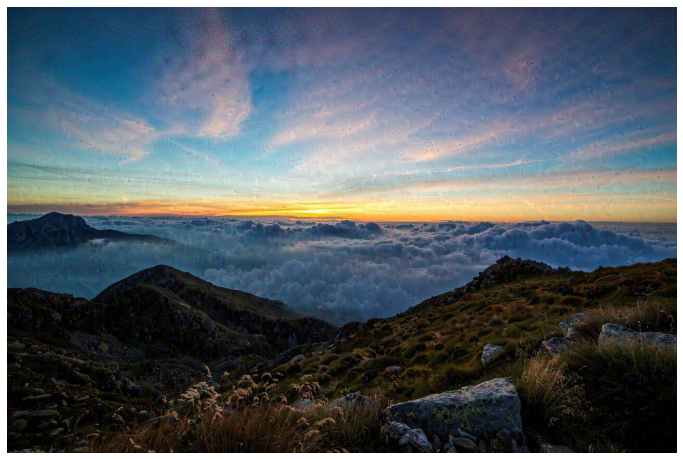

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from imageio import imread
from IPython.display import clear_output
def download(path):
  img = imread(path)
  img = image.img_to_array(img)
  return image.img_to_array(img)

def preprocess(img):
  return (img/127.5)-1
def deprocess(img):
  img = img.copy()
  img /= 2.
  img += 0.5
  img *=255
  return np.clip(img,0,255).astype('uint8')

def show(img):
  plt.figure(figsize=(12,12))
  plt.grid(False)
  plt.axis('off')
  plt.imshow(img)

path = './cloud-landscape.jpg'
img = preprocess(download(path))
show(deprocess(img))

inception_v3 = InceptionV3(include_top=False,weights='imagenet')
names = ['mixed2','mixed3','mixed4','mixed5']
layers = [inception_v3.get_layer(name).output for name in names]
feature_extract_model = tf.keras.models.Model(inputs=inception_v3.input,outputs=layers)

def forward(img):
    img_batch = tf.expand_dims(img,axis=0)
    return feature_extract_model(img_batch)

def calc_loss(layer_activations):
    total_loss = 0
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        loss /= np.prod(act.shape)
        total_loss += loss
    return total_loss



img = tf.Variable(img)
steps = 400
with tf.device('gpu:0'):
    for step in range(steps):
      with tf.GradientTape() as tape:
        activations = forward(img)
        loss = calc_loss(activations)
      gradients = tape.gradient(loss,img)
      gradients /= gradients.numpy().std() + 1e-8

      img.assign_add(gradients)
      if steps %50 == 0:
          clear_output()
          print('Step %d, loss %f'% (step,loss))
          show(deprocess(img.numpy()))
          plt.show()
        
        
